## Descarga y formatting del CSV de los datos

In [1]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [2]:
import os
print(os.getcwd())

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/dataset.csv", sep = ';')
data = data.dropna(subset=['price'])
data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [5]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

## Descarga de imágenes

In [6]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

**RECORDAD SEÑALAR LA COLUMNA ADECUADA**

In [7]:
images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape

100%|██████████| 7199/7199 [48:28<00:00,  2.47it/s]


(6261, 224, 224, 3)

Filtrado acorde en los demás datos

In [9]:
# Filtramos el df para quedarnos con las columnas que descargaron efectivamente las imagenes

filtered_data = data.iloc[idxs]
filtered_data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [10]:
# Contar el número total de filas antes de eliminar duplicados
filas_totales = len(filtered_data)

# Contar el número de filas únicas
filas_unicas = len(filtered_data.drop_duplicates())

# Calcular el número de filas duplicadas
filas_duplicadas = filas_totales - filas_unicas

# Imprimir el resultado
print(f"Se eliminarán {filas_duplicadas} filas duplicadas.")

#El resultado es
#Se eliminarán 3130 filas duplicadas.

Se eliminarán 3130 filas duplicadas.


In [15]:
# Eliminar filas duplicadas y reiniciar el índice
filtered_data = filtered_data.drop_duplicates().reset_index(drop=True)


In [22]:
#Alinear images a la longitud de filtered_data
images = images[:len(filtered_data)]


In [79]:
# Eliminar el símbolo de dólar y convertir a tipo numérico label 'price'
filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)
# Ver solo la columna 'price'
print(filtered_data['price'])



0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
3126     83.0
3127    107.0
3128    136.0
3129     83.0
3130    106.0
Name: price, Length: 3131, dtype: float64


## Guardado de los datos para posterior uso/selección

In [80]:
np.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
!cp images.npy /content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/filtered_data.csv
!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 3.4M Nov 11 18:45 filtered_data.csv
-rw-r--r-- 1 root root 1.8G Nov 11 18:45 images.npy


In [83]:
# Comprobamos a abrirlos de nuevo
saved_data = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/filtered_data.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/images_final.npy")
saved_data.shape, saved_imgs.shape

((3131, 72), (3131, 224, 224, 3))

In [84]:
saved_imgs

array([[[[0.5411765 , 0.5137255 , 0.5176471 ],
         [0.54901963, 0.5254902 , 0.5254902 ],
         [0.5411765 , 0.53333336, 0.5254902 ],
         ...,
         [0.31764707, 0.3529412 , 0.36078432],
         [0.31764707, 0.3529412 , 0.36078432],
         [0.30588236, 0.34509805, 0.34901962]],

        [[0.6509804 , 0.59607846, 0.5882353 ],
         [0.61960787, 0.5686275 , 0.5647059 ],
         [0.5882353 , 0.54509807, 0.54509807],
         ...,
         [0.3254902 , 0.3647059 , 0.36862746],
         [0.32156864, 0.35686275, 0.36078432],
         [0.3137255 , 0.3529412 , 0.35686275]],

        [[0.80784315, 0.7607843 , 0.74509805],
         [0.7882353 , 0.7411765 , 0.7254902 ],
         [0.77254903, 0.7254902 , 0.7176471 ],
         ...,
         [0.34117648, 0.37254903, 0.38039216],
         [0.33333334, 0.37254903, 0.3764706 ],
         [0.3254902 , 0.3647059 , 0.36862746]],

        ...,

        [[0.16078432, 0.16470589, 0.14117648],
         [0.29411766, 0.2901961 , 0.27450982]

In [93]:
# Ver las primeras 5 filas de todas las columnas en filtered_data
saved_data.head()


,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09


Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<Axes: >

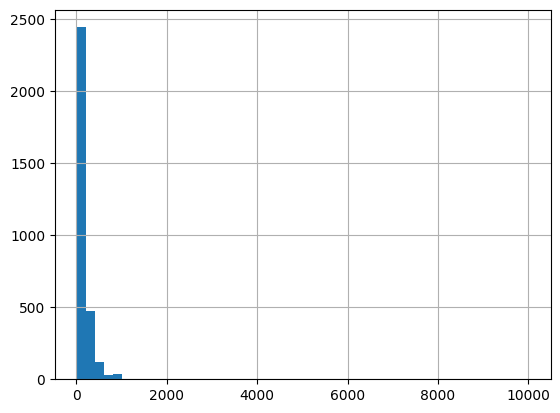

In [92]:
saved_data['price'].hist(bins=50)

count     3131.000000
mean       183.891089
std        321.657610
min         20.000000
25%         76.000000
50%        120.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64


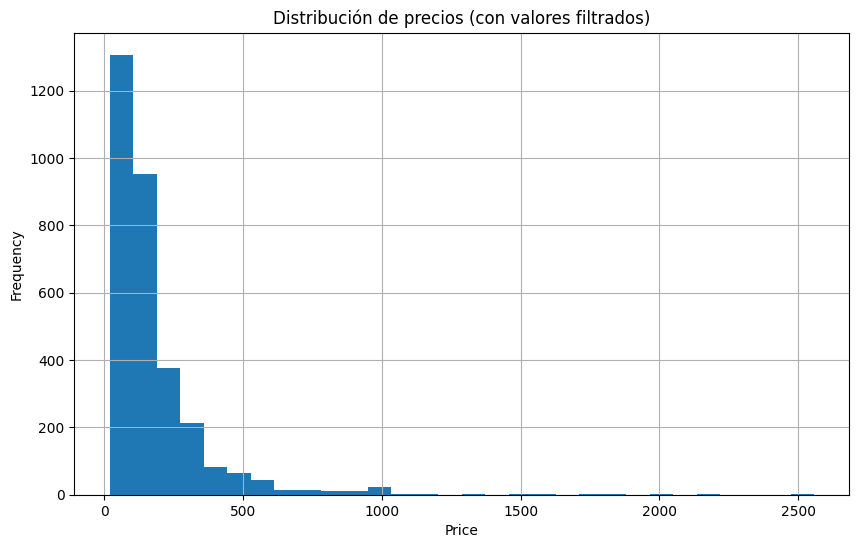

In [100]:
import matplotlib.pyplot as plt

# Ver el resumen estadístico para entender el rango de 'price'
print(saved_data['price'].describe())

# Filtrar valores extremos (puedes ajustar el umbral según tus datos)
filtered_prices = saved_data[saved_data['price'] < 3000]['price']  # Ajusta 1000 a un valor razonable según tus datos

# Crear el histograma con un número de bins más bajo para mejor visualización
plt.figure(figsize=(10, 6))
filtered_prices.hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribución de precios (con valores filtrados)')
plt.show()




Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [95]:
saved_data['price'].describe()

,price
count,3131.000000
mean,183.891089
std,321.657610
min,20.000000
25%,76.000000
50%,120.000000
75%,200.000000
max,10000.000000


<Axes: >

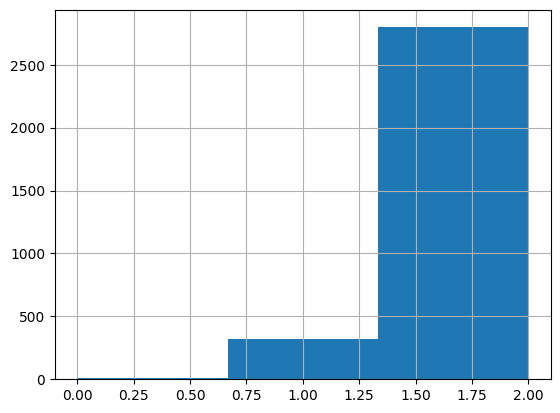

In [96]:
y_class = []
for y in saved_data['price']:
  if y <= 32:
    y_class.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pd.Series(y_class)
y_class.hist(bins=3)

In [101]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
